<a href="https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day4/data_parallelism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ並列化

- 親モデルを各ワーカーに子モデルとしてコピー
- データを分割し、各ワーカーごとに計算させる
- データ並列化は各モデルのパラメータの合わせ方で、同期型か非同期型か決まる

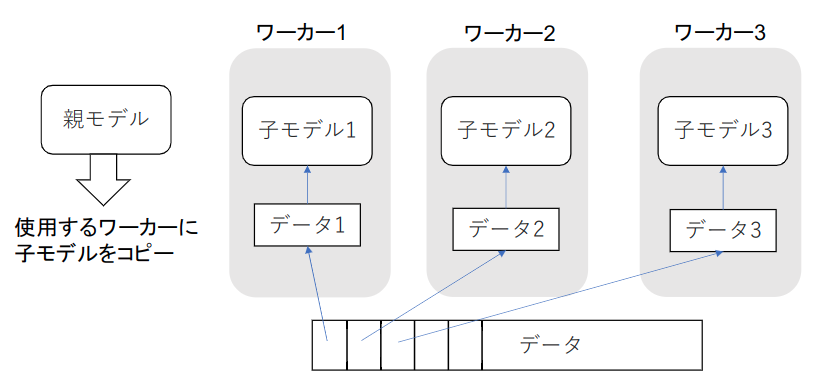

## 同期型

**各ワーカーが計算が終わるのを待ち**、全ワーカーの勾配が出たところで勾配の平均を計算し、親モデルのパラメータを更新する。

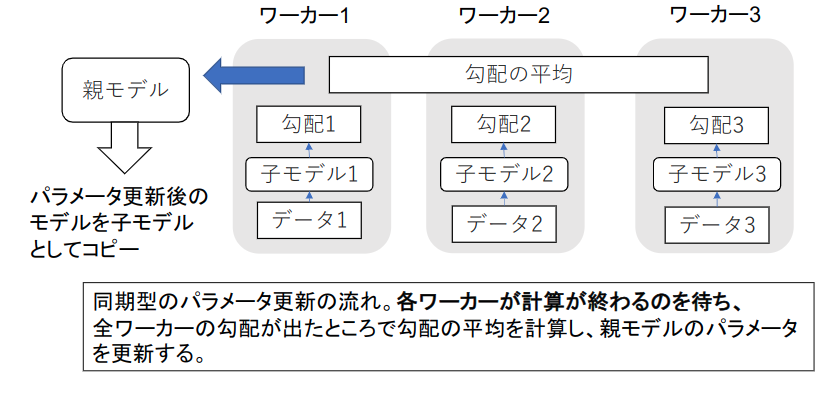

## 非同期型

**各ワーカーはお互いの計算を待たず**、各子モデルごとに更新を行う。学習が終わった子モデルはパラメータサーバにPushされる。新たに学習を始める時は、パラメータサーバからPopしたモデルに対して学習していく。

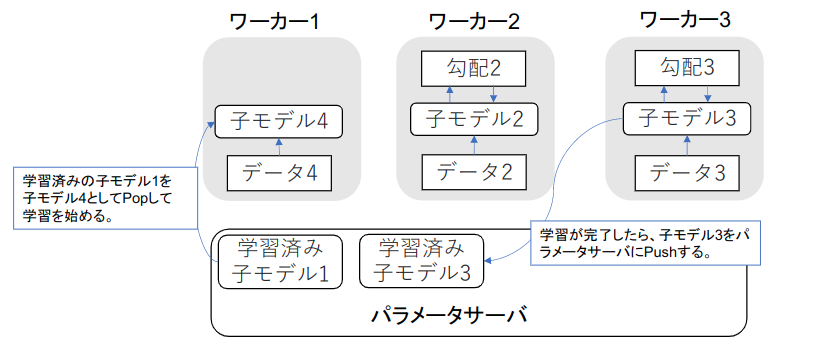

## 比較

- 処理のスピードは、お互いのワーカーの計算を待たない非同期型の方が早い。
- 非同期型は最新のモデルのパラメータを利用できないので、学習が不安定になりやすい。\
  -> Stale Gradient Problem
- 現在は同期型の方が精度が良いことが多いので、主流となっている。
